<a href="https://colab.research.google.com/github/sike990/Zomato_EDA/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial Setup


In [1]:
!git clone https://github.com/sike990/Zomato_EDA.git

Cloning into 'Zomato_EDA'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 710.87 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os

#Data Preprocessing

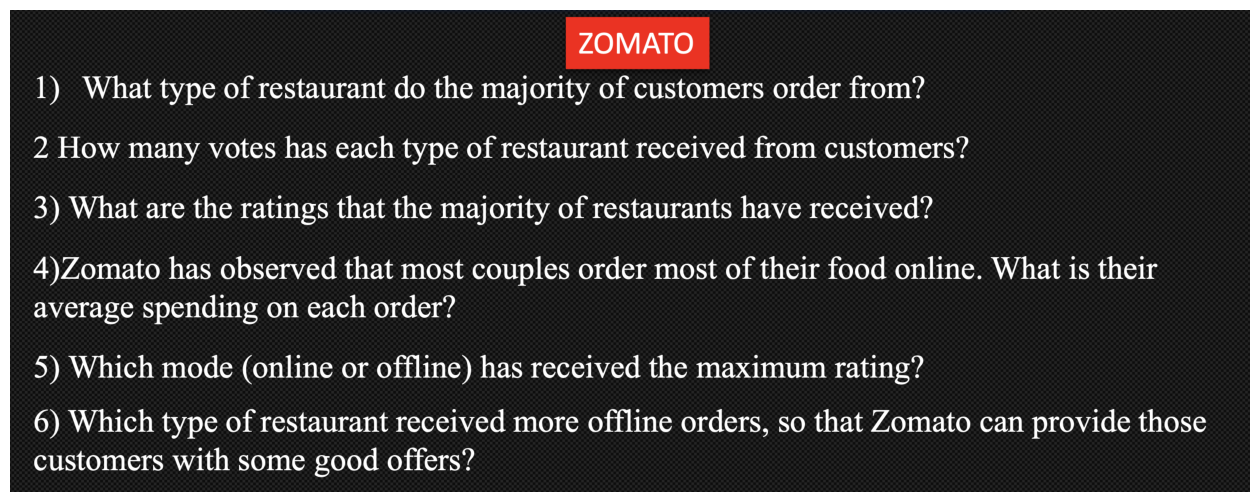

In [4]:
image = mpimg.imread("/content/Zomato_EDA/Analysis_Objective.png")

plt.figure(figsize = (16,8))
plt.imshow(image)
plt.axis(False)
plt.show()

In [5]:
data = pd.read_csv("/content/Zomato_EDA/Zomato data .csv")

In [6]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [9]:
def handleRate(value):
  value = value.split('/')
  value = value[0]
  return float(value)

data['rate'] = data['rate'].apply(handleRate)

In [12]:
data = data.rename(columns = {'listed_in(type)' : 'Kind'})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   Kind                         148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB




```
Question 1: Which kind of resturant is more popular among customers
```



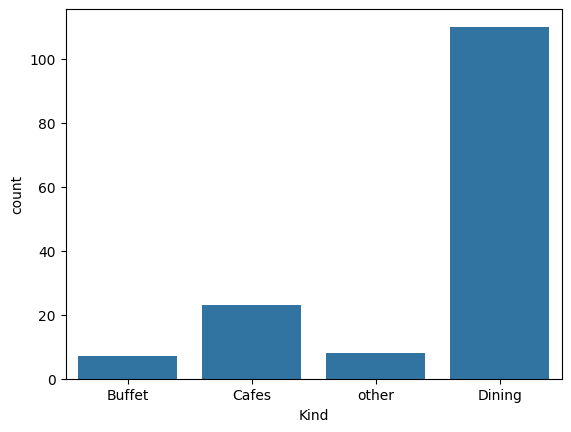

In [14]:
sns.countplot(x = data["Kind"])
plt.show()



```
Clearly the Dining kind of resturant is more popular
```





```
Question 2 : How many votes deos each kind of returant has received from custumers?
```



In [15]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),Kind
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [ ]:
gk = data.groupby('Kind')
gk.first()